<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [31]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2024-07-09 14:28:49--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104, 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite.5’

m4_survey_data.sqli 100%[===================>]  34.98M  36.2MB/s    in 1.0s    

2024-07-09 14:28:51 (36.2 MB/s) - ‘m4_survey_data.sqlite.5’ saved [36679680/36679680]



Connect to the database.


In [32]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [33]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Demo: How to run an sql query


In [34]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [36]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [37]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [64]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


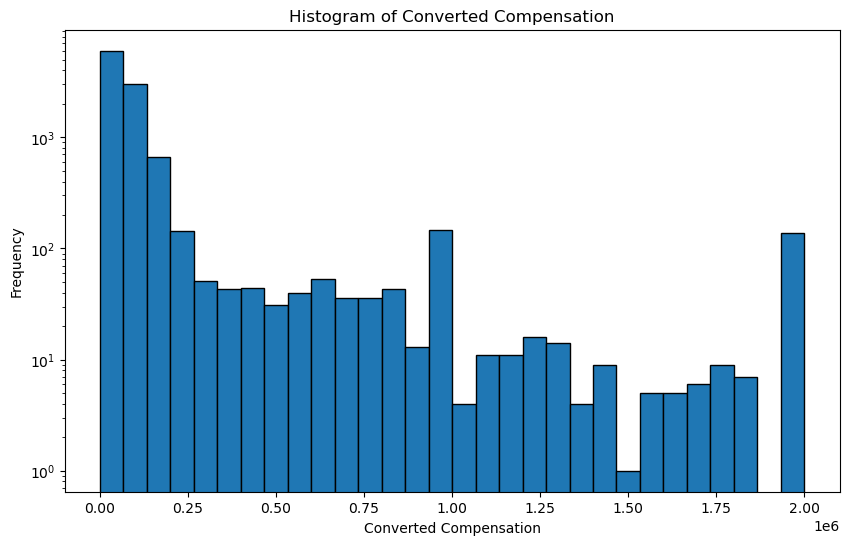

In [12]:

# Connect to the SQLite database
conn = sqlite3.connect('m4_survey_data.sqlite')

# Query the data
query = "SELECT ConvertedComp FROM master"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Drop rows with missing values
df.dropna(subset=['ConvertedComp'], inplace=True)

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['ConvertedComp'], bins=30, edgecolor='k')
plt.title('Histogram of Converted Compensation')
plt.xlabel('Converted Compensation')
plt.ylabel('Frequency')
plt.yscale('log')  # Use logarithmic scale for better visualization
plt.show()

### Box Plots


Plot a box plot of `Age.`


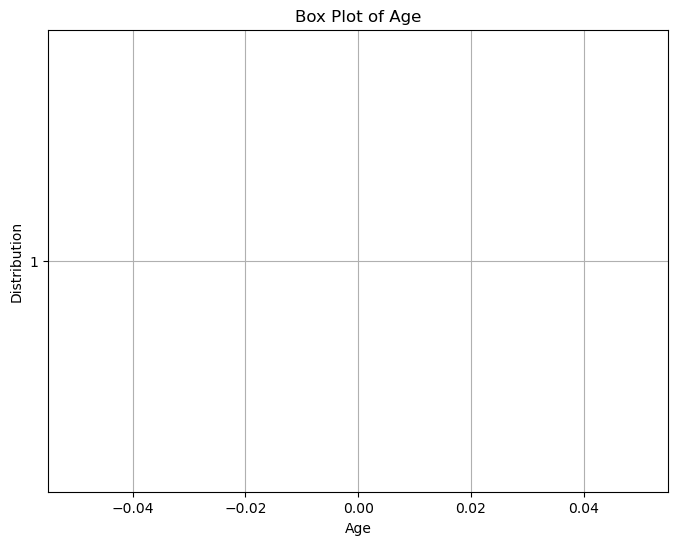

In [68]:
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a pandas DataFrame
query = "SELECT Age FROM master"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create a box plot of Age
plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)  # vert=False for horizontal box plot
plt.title('Box Plot of Age')
plt.xlabel('Age')
plt.ylabel('Distribution')
plt.grid(True)
plt.show()

## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


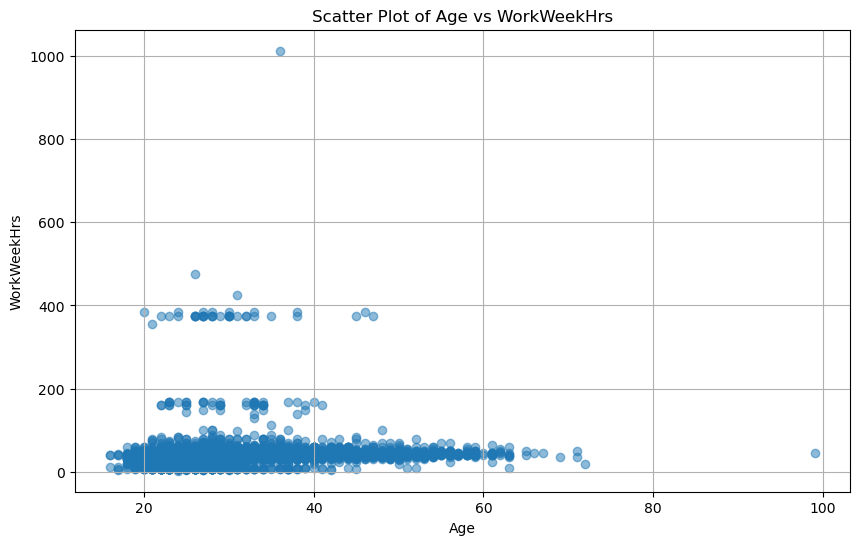

In [14]:
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a pandas DataFrame
query = "SELECT Age, WorkWeekHrs FROM master"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create a scatter plot of Age vs WorkWeekHrs
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['WorkWeekHrs'], alpha=0.5)
plt.title('Scatter Plot of Age vs WorkWeekHrs')
plt.xlabel('Age')
plt.ylabel('WorkWeekHrs')
plt.grid(True)
plt.show()


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


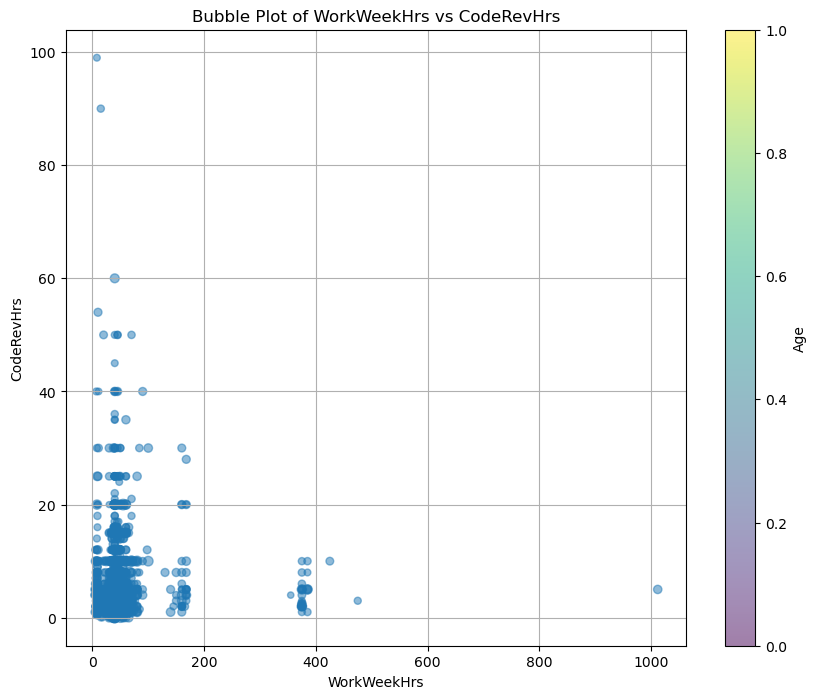

In [17]:
conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a pandas DataFrame
query = "SELECT WorkWeekHrs, CodeRevHrs, Age FROM master"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Extract data for plotting
x = df['WorkWeekHrs']
y = df['CodeRevHrs']
bubble_size = df['Age']  # Use Age column for bubble size

# Create the bubble plot
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=bubble_size, alpha=0.5)
plt.title('Bubble Plot of WorkWeekHrs vs CodeRevHrs')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')
plt.grid(True)
plt.colorbar(label='Age')  # Color bar indicating bubble sizes
plt.show()

## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


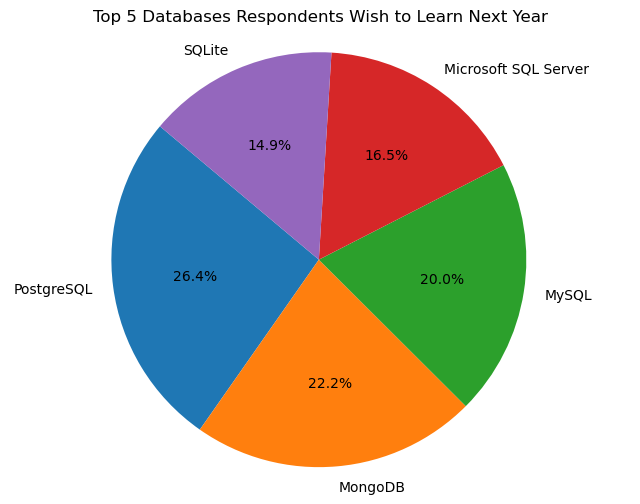

In [59]:
conn = sqlite3.connect('m4_survey_data.sqlite')

# Query to get the top 5 databases respondents wish to learn next year
query = """
    SELECT DatabaseDesireNextYear, COUNT(*) as Count
    FROM DatabaseDesireNextYear
    WHERE DatabaseDesireNextYear IN ('MySQL', 'PostgreSQL', 'Microsoft SQL Server', 'MongoDB', 'SQLite')
    GROUP BY DatabaseDesireNextYear
    ORDER BY Count DESC
    LIMIT 5
"""

# Load data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Calculate percentages
df['Percentage'] = (df['Count'] / df['Count'].sum()) * 100

# Plotting
plt.figure(figsize=(8, 6))
plt.pie(df['Count'], labels=df['DatabaseDesireNextYear'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Databases Respondents Wish to Learn Next Year')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


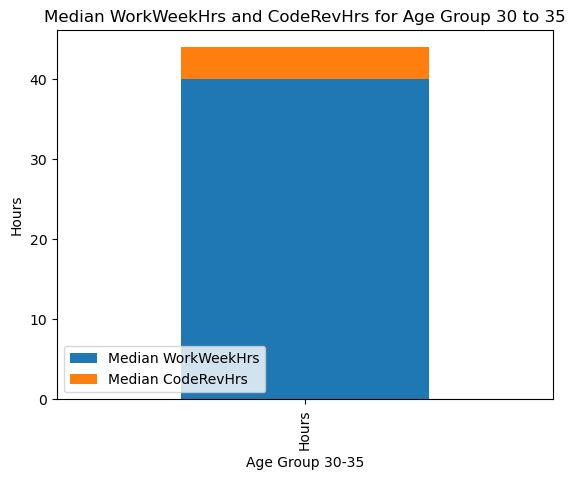

In [65]:
conn = sqlite3.connect('m4_survey_data.sqlite')

# Query to get WorkWeekHrs and CodeRevHrs for the age group 30 to 35
query = """
    SELECT WorkWeekHrs, CodeRevHrs
    FROM master
    WHERE Age BETWEEN 30 AND 35
"""

# Load data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Calculate median values
median_workweekhrs = df['WorkWeekHrs'].median()
median_coderevhrs = df['CodeRevHrs'].median()

# Prepare data for plotting
data = {
    'Median WorkWeekHrs': median_workweekhrs,
    'Median CodeRevHrs': median_coderevhrs
}

# Create a DataFrame for plotting
plot_df = pd.DataFrame(data, index=['Hours'])

# Plotting
plot_df.plot(kind='bar', stacked=True)
plt.title('Median WorkWeekHrs and CodeRevHrs for Age Group 30 to 35')
plt.ylabel('Hours')
plt.xlabel('Age Group 30-35')
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


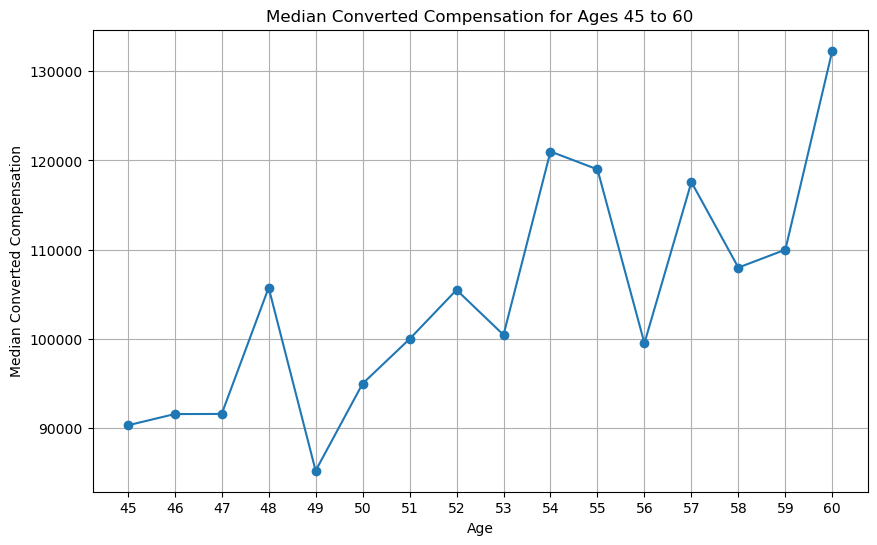

In [66]:

conn = sqlite3.connect('m4_survey_data.sqlite')

# Query to get Age and ConvertedComp for ages 45 to 60
query = """
    SELECT Age, ConvertedComp
    FROM master
    WHERE Age BETWEEN 45 AND 60
"""

# Load data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Group by Age and calculate the median ConvertedComp for each age
median_comp_by_age = df.groupby('Age')['ConvertedComp'].median().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(median_comp_by_age['Age'], median_comp_by_age['ConvertedComp'], marker='o')
plt.title('Median Converted Compensation for Ages 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Converted Compensation')
plt.grid(True)
plt.xticks(range(45, 61))  # Ensures every age from 45 to 60 is shown on the x-axis
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


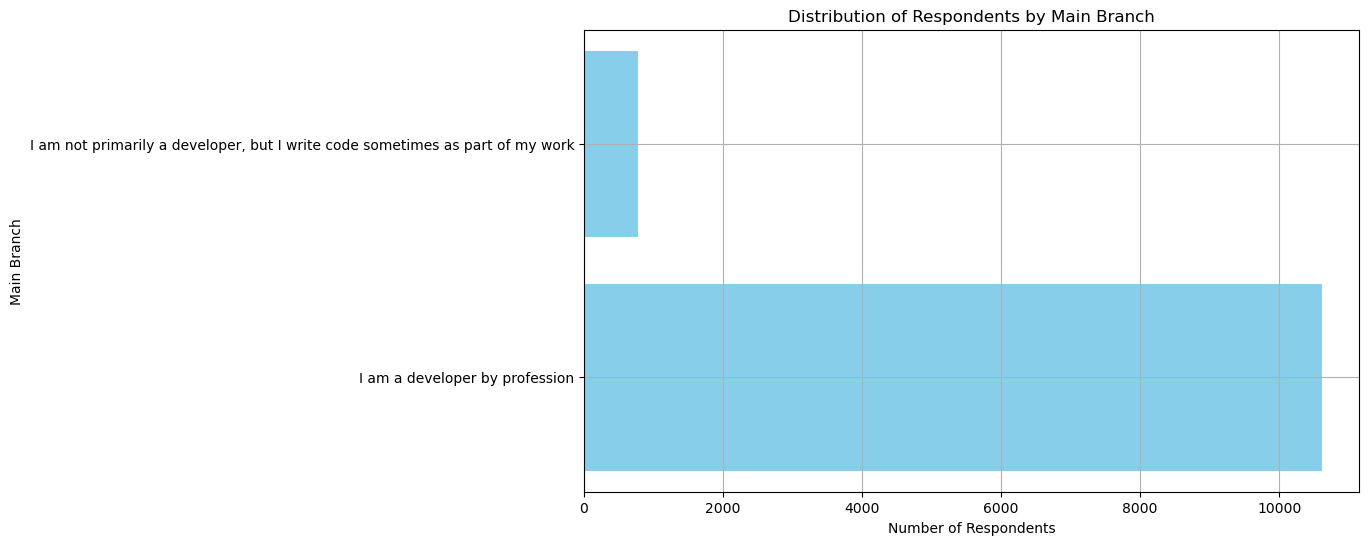

In [24]:
# your code goes here

conn = sqlite3.connect('m4_survey_data.sqlite')

# Load data into a pandas DataFrame
query = "SELECT MainBranch, COUNT(*) as Count FROM master GROUP BY MainBranch"
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(df['MainBranch'], df['Count'], color='skyblue')
plt.xlabel('Number of Respondents')
plt.ylabel('Main Branch')
plt.title('Distribution of Respondents by Main Branch')
plt.grid(True)
plt.show()

Close the database connection.


In [ ]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
